# What is Regularization?

## Why Ridge Regression is needed

### Lasso Regression (L1 Regularization)

### Why Lasso Regression is Needed

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
data={
    "Area":[800,900,1000,1100,1200,1300,1400,1500,1600,1700],
    "Bedrooms":[1,2,2,2,3,3,3,4,4,4],
    "Bathrooms":[1,1,2,2,2,2,3,3,3,3],
    "Age":[15,12,10,8,6,5,4,3,2,1],
    "Distance_City":[15,14,13,12,10,9,8,7,6,5],
    "Price":[40,50,55,60,70,75,80,90,95,100]
}
df=pd.DataFrame(data)


In [6]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [61]:
Linear=LinearRegression()
Linear.fit(x_train_scaled,y_train)

LinearRegression()

In [62]:
ridge=Ridge(alpha=2.0)
ridge.fit(x_train_scaled,y_train)

Ridge(alpha=2.0)

In [63]:
y_train_pred_lin=Linear.predict(x_train_scaled)
y_test_pred_lin=Linear.predict(x_test_scaled)

In [64]:
train_mse_lin=mean_squared_error(y_train,y_train_pred_lin)
test_mse_lin=mean_squared_error(y_test,y_test_pred_lin)
print("Train MSE:", train_mse_lin)
print("Test MSE:", test_mse_lin)

Train MSE: 0.0
Test MSE: 2.524354896707238e-29


In [65]:
y_train_pred_rid=ridge.predict(x_train_scaled)
y_test_pred_rid=ridge.predict(x_test_scaled)

In [66]:
train_mse_rid=mean_squared_error(y_train,y_train_pred_rid)
test_mse_rid=mean_squared_error(y_test,y_test_pred_rid)
print("Train MSE:", train_mse_rid)
print("Test MSE:", test_mse_rid)

Train MSE: 2.725804603905367
Test MSE: 3.19803774145094


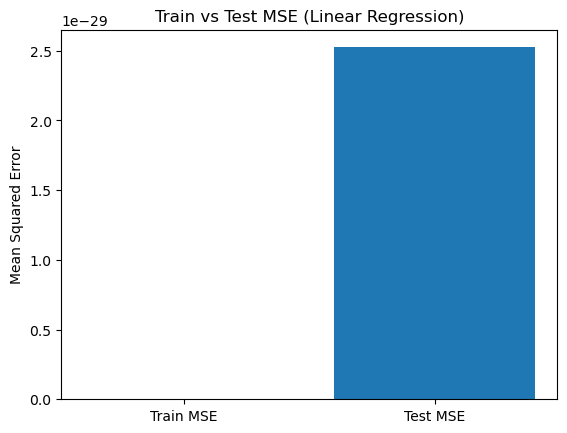

In [67]:
plt.bar(["Train MSE","Test MSE"],[train_mse_lin,test_mse_lin])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Linear Regression)")
plt.show()

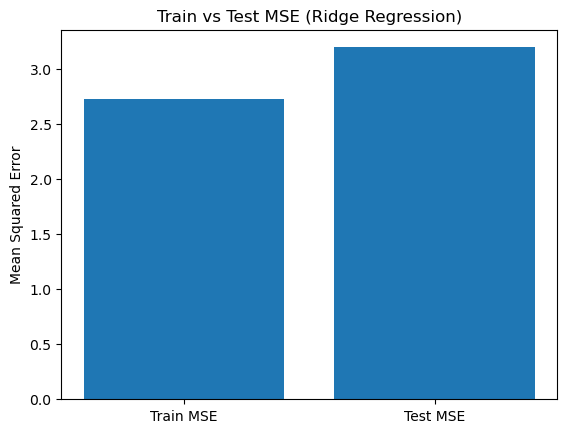

In [68]:
plt.bar(["Train MSE","Test MSE"],[train_mse_rid,test_mse_rid])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Ridge Regression)")
plt.show()

# Lasso Regularization

In [69]:
lasso= Lasso(alpha=0.5)
lasso.fit(x_train_scaled,y_train)

Lasso(alpha=0.5)

In [70]:
y_train_pred=lasso.predict(x_train_scaled)
y_test_pred=lasso.predict(x_test_scaled)

In [71]:
Train_MSE_Lasso = mean_squared_error(y_train, y_train_pred)
Test_MSE_Lasso = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", Train_MSE_Lasso)
print("Test MSE:", Test_MSE_Lasso)

Train MSE: 0.2540521315349298
Test MSE: 0.35590211738900734


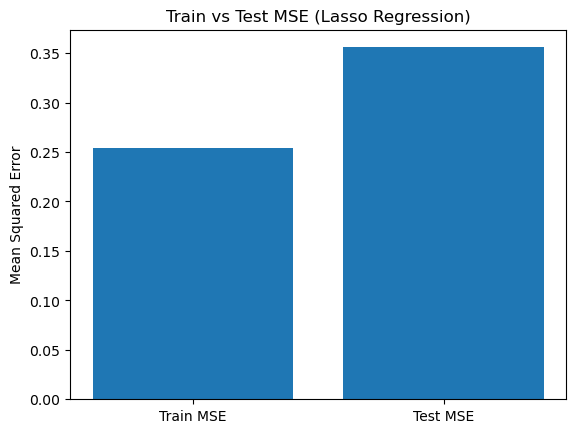

In [72]:
plt.bar(["Train MSE", "Test MSE"], [Train_MSE_Lasso, Test_MSE_Lasso])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Lasso Regression)")
plt.show()

In [73]:
lasso_coefficients=pd.Series(lasso.coef_,index=x.columns)
print(lasso_coefficients)

Area             13.200626
Bedrooms          4.581169
Bathrooms         0.000000
Age              -0.000000
Distance_City    -0.013020
dtype: float64


In [75]:
X_plot=pd.DataFrame({
    "Area":np.linspace(df["Area"].min(),df["Area"].max(),100),
    "Bedrooms": df["Bedrooms"].mean(),
    "Bathrooms":df["Bathrooms"].mean(),
    "Age": df["Age"].mean(),
    "Distance_City": df["Distance_City"].mean()
    })

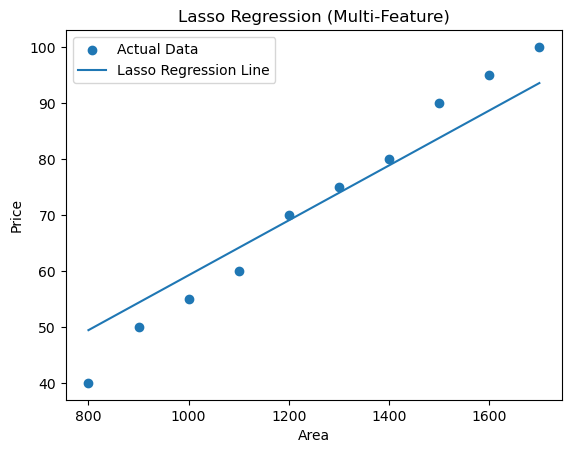

In [76]:
x_plot_scaled=scaler.transform(X_plot)
y_line=lasso.predict(x_plot_scaled)
plt.scatter(df["Area"],df["Price"],label="Actual Data")
plt.plot(X_plot["Area"],y_line,label="Lasso Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Lasso Regression (Multi-Feature)")
plt.legend()
plt.show()